In [5]:
import sys

sys.path.append("../src")

In [6]:
import make_hamiltonian
import importlib
from scipy import sparse
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import green_function

importlib.reload(green_function)
importlib.reload(make_hamiltonian)
from make_hamiltonian import *

from green_function import *

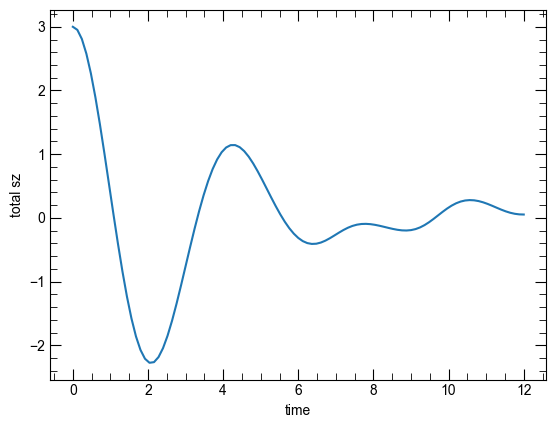

In [7]:
L = 6
sp_ops = Hamiltonian.make_spin_ops()
sx, sz = sp_ops["Sx"], sp_ops["Sz"]

h0 = sum(Hamiltonian.create_single_site_operator_matrix(sx, i, L) for i in range(L))
h1 = sum(
    Hamiltonian.create_two_site_operator_matrix(sz, i, sz, (i + 1) % L, L)
    for i in range(L)
)
total_sz = np.zeros((2**L, 2**L))
for i in range(L):
    total_sz += Hamiltonian.create_single_site_operator_matrix(sz, i, L).toarray()
initial_state = np.zeros(2**L)
initial_state[0] = 1

val, vec = np.linalg.eigh((1.5 * h0 + h1).toarray())
vec = np.array(vec)
initial_state_eigen = vec.T @ initial_state
times = np.linspace(0, 12, 101)

time_evoluted_eigen = initial_state_eigen * np.exp(
    -1.0j * val[None, :] * times[:, None]
)
# time_evoluted_eigen_vec = vec @ time_evoluted_eigen
time_evoluted_total_sz = [
    (time_evoluted_eigen[i].T.conj() @ vec.T @ total_sz @ vec @ time_evoluted_eigen[i])
    for i in range(len(times))
]
fig, ax = plt.subplots()
ax.plot(times, np.array(time_evoluted_total_sz).real)
ax.set_xlabel("time")
ax.set_ylabel("total sz")
plt.show()